<a href="https://colab.research.google.com/github/Jinishaa/Linear-regression./blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing required libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
df = pd.read_csv('http://bit.ly/w-data')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Exploring the dataset

- checking if any null values are present in the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

- Checking the range of values and other data statistics

In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Splitting the dataset into feature and target variable

In [6]:
X = df['Hours']
y = df['Scores']

len(X), len(y)

(25, 25)

## Creating train and test splits

- Split the data into training and test sets using the `train_test_split` function.
- By splitting the data into training and test sets, we can use the training set to fit the model, and then use the test set to evaluate the model's performance. The test set is a subset of the data that the model has not seen during training, so it provides an unbiased estimate of how well the model is likely to perform on new, unseen data.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2, # 20% dataset for testing
                                                    random_state=42)
(len(X_train), len(y_train)), (len(X_test), len(y_test))

((20, 20), (5, 5))

## Linear Regression

- Linear regression is a statistical method for modeling the relationship between a dependent variable (also known as the response variable or target) and one or more independent variables (also known as predictor variables or features). The goal of linear regression is to find the best linear relationship between the independent and dependent variables by minimizing the differences between the predicted and actual values.

- The basic idea behind linear regression is to fit a line through a set of data points. The line is represented by an equation of the form: 

    `y = b0 + b1*x`
    
    - Where y is the dependent variable, x is the independent variable, b0 is the y-intercept, and b1 is the slope of the line.


- it is important to note that linear regression assumes a linear relationship between the independent and dependent variables,

In [8]:
model = LinearRegression()
model.fit(X_train.values.reshape(-1, 1), y_train)

LinearRegression()

In [9]:
model.coef_

array([9.68207815])

In [10]:
model.intercept_

2.826892353899737

## Evaluating our model

- Mean Squared Error (MSE) and Mean Absolute Error (MAE) are two commonly used metrics for evaluating the performance of a regression model.

- R-squared (R^2) is a statistical measure of how close the data is to the fitted regression line. It ranges from 0 to 1, where a value of 1 indicates that all the data points fall on the fitted regression line, and a value of 0 indicates that the model does not explain any of the variability of the response data around its mean.

In [11]:
# Make predictions using our test dataset

y_pred = model.predict(X_test.values.reshape(-1,1))

print(y_pred[:5])

[83.18814104 27.03208774 27.03208774 69.63323162 59.95115347]


### Mean Absolute Error

- Mean Absolute Error (MAE) is the average of the absolute differences between the predicted and actual values. It is less sensitive to outliers than the MSE, but still provides a measure of how well the model is fitting the data.

In [12]:
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}')

Mean Absolute Error: 3.9207511902099244


## R2 score

- R-squared (R^2) is a statistical measure of how close the data is to the fitted regression line. It ranges from 0 to 1, where a value of 1 indicates that all the data points fall on the fitted regression line, and a value of 0 indicates that the model does not explain any of the variability of the response data around its mean.

- A high R-squared value indicates that the model is a good fit for the data, while a low R-squared value indicates that the model is not a good fit for the data.

In [13]:
print(f'R2 score: {r2_score(y_test, y_pred)}')

R2 score: 0.9678055545167994


### Mean Squared Error

- Mean Squared Error (MSE) is the average of the squared differences between the predicted and actual values. It is a commonly used loss function for regression problems and is a measure of how well the model fits the data. The MSE is sensitive to outliers, so it is affected when there are extreme differences between the predicted and actual values.

In [14]:
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')

Mean Squared Error: 18.943211722315272


## Linear Regression plot

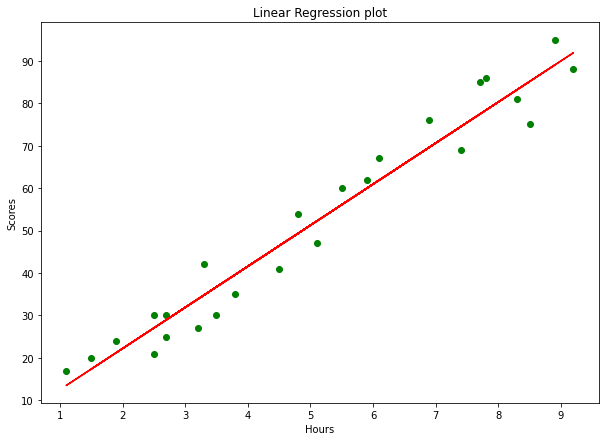

In [15]:
y_pred_all = model.predict(X.values.reshape(-1,1))

plt.figure(figsize=(10,7))
plt.scatter(X, y, color='green')
plt.plot(X, y_pred_all, color='red')
plt.title('Linear Regression plot')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

## What will be predicted score if a student studies for 9.25 hrs/ day?

In [16]:

predicted_score = model.predict([[9.25]])
print(f'The predicted score if a student if a student studies for 9.25 hrs/ day is: {predicted_score[0].round(2)}')

The predicted score if a student if a student studies for 9.25 hrs/ day is: 92.39
